In [2]:
#importing required librarires

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
#importing the data
import pandas as pd

df = pd.read_csv(r"C:\anaconda\New folder (2)\forestfires.csv")
df


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
#EDA
df.shape


df.isna().sum()

df.columns


df.describe()



for i in df.columns:
    print(df[i].value_counts())
    print()


aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

92.1    28
91.6    28
91.0    22
91.7    19
92.4    16
        ..
86.9     1
85.2     1
53.4     1
85.1     1
94.4     1
Name: FFMC, Length: 106, dtype: int64

99.0     10
129.5     9
231.1     8
142.4     8
35.8      7
         ..
138.1     1
109.2     1
91.6      1
122.3     1
146.0     1
Name: DMC, Length: 215, dtype: int64

745.3    10
692.6     9
692.3     8
715.1     8
698.6     8
         ..
565.5     1
503.6     1
589.9     1
85.3      1
106.7     1
Name: DC, Length: 219, dtype: int64

9.6     23
7.1     21
6.3     20
8.4     17
7.0     17
        ..
16.5     1
2.2      1
8.3      1
2.0      1
1.1      1
Name: ISI, Length: 119, dtype: int64

17.4    8
19.6    8
15.4    7
20.6    7
20.4    6
       ..
16.3    1
12.8    1
10.4    

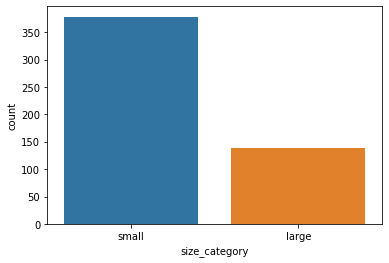

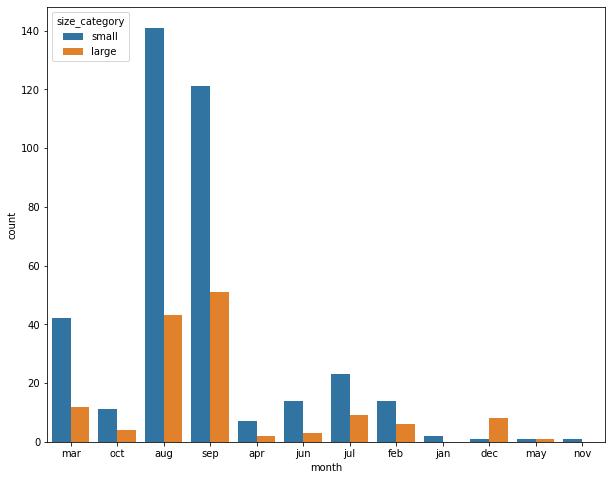

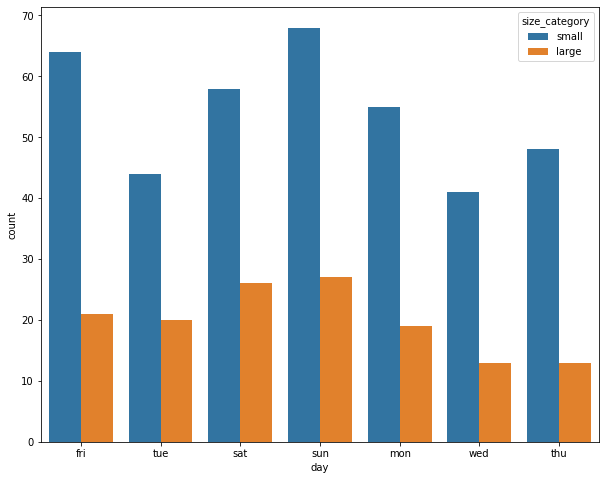

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


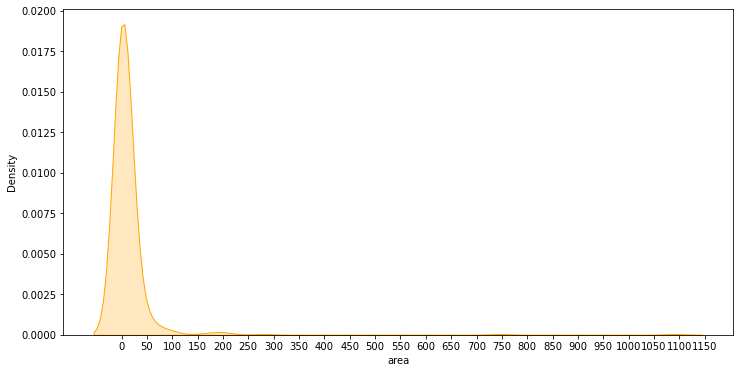

In [5]:
#Visualization of Data parameters
sns.countplot(df['size_category'])
plt.show()


plt.figure(figsize=(10,8))
sns.countplot(x = df['month'],hue=df['size_category'])
plt.show()


plt.figure(figsize=(10,8))
sns.countplot(x = df['day'],hue=df['size_category'])
plt.show()



plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize = (12,6))
print("Skew: {}".format(df['area'].skew()))
print("Kurtosis: {}".format(df['area'].kurtosis()))
ax = sns.kdeplot(df['area'],shade = True,color = 'orange')
plt.xticks([i for i in range(0,1200,50)])
plt.show()


In [6]:
#The Dataset is highly skewed and has large kurtosis value.
#Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land.

<AxesSubplot:>

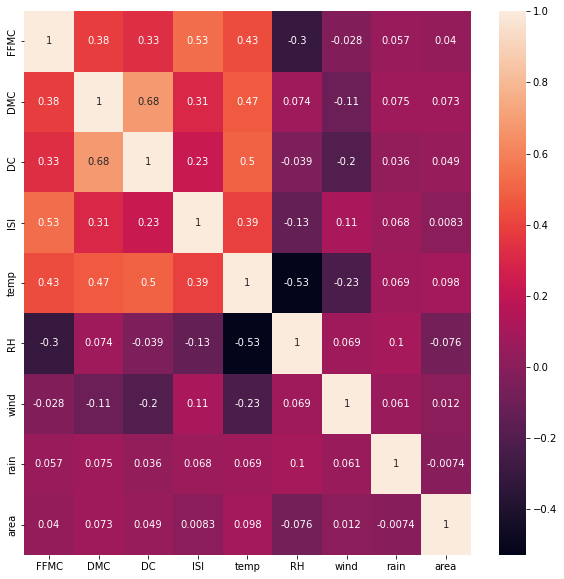

In [7]:
#correlation 
corr = df[df.columns[0:11]].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr,annot = True)


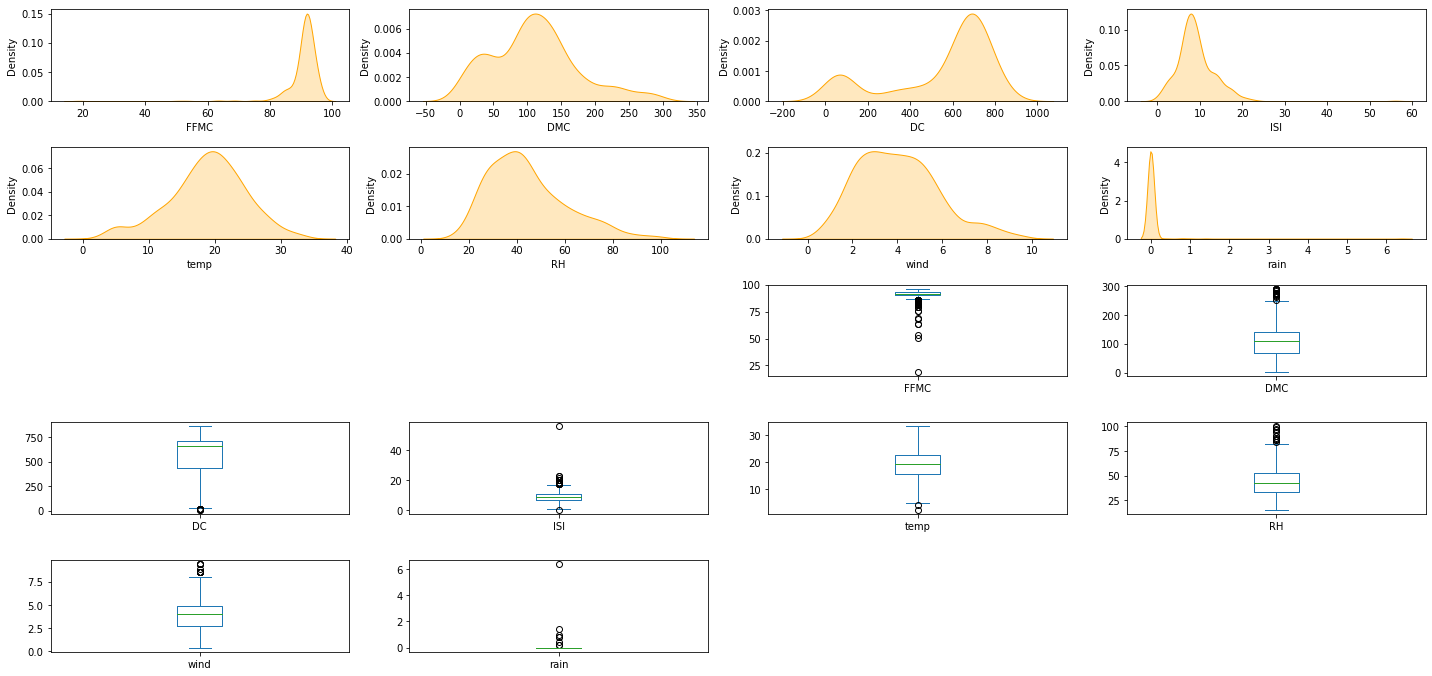

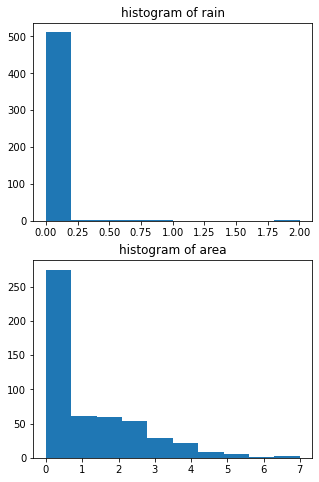

In [8]:
dfa = df[df.columns[0:10]]
month_colum = dfa.select_dtypes(include = 'object').columns.tolist()
num_columns = dfa.select_dtypes(exclude = 'object').columns.tolist()
plt.figure(figsize = (20,15))

for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color = 'orange',shade = True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data = [num_data.skew(),num_data.kurtosis()],index = ['skewness','kurtosis'])


# natural logarithm scaling (+1 to prevent errors at 0)
df.loc[:, ['rain', 'area']] = df.loc[:, ['rain', 'area']].apply(lambda x: np.log(x + 1), axis = 1)
fig, ax = plt.subplots(2, figsize = (5, 8))
ax[0].hist(df['rain'])
ax[0].title.set_text('histogram of rain')
ax[1].hist(df['area'])
ax[1].title.set_text('histogram of area')



In [9]:
drop_data = df.drop(labels=['month','day'],axis = 1)
drop_data


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.000000,0.000000,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.000000,0.000000,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.000000,0.000000,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.182322,0.000000,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.000000,0.000000,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.000000,2.006871,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.000000,4.012592,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.000000,2.498152,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,small


<AxesSubplot:xlabel='size_category', ylabel='count'>

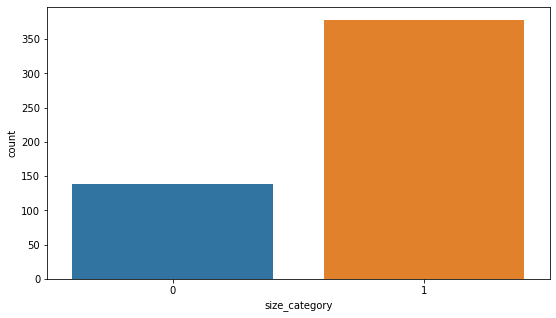

In [10]:
le = LabelEncoder()
drop_data['size_category'] = le.fit_transform(drop_data['size_category'])
drop_data

sns.countplot(drop_data['size_category'])


In [11]:
mapping = {'small': 1, 'large': 2}
drop_data = drop_data.replace(mapping)


In [12]:
#split the data into x and y

x = drop_data.drop(labels='size_category',axis = 1)
y = drop_data[['size_category']]


In [13]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.30,random_state=12)



In [14]:
#Data Is Imbalance so i have to balance it , so i m using here smote operation of balancing technique
sm = SMOTE(random_state=12)
x_train_sm,y_train_sm = sm.fit_resample(x_train,np.array(y_train).ravel())
x_train_sm,y_train_sm


(          FFMC         DMC          DC        ISI       temp  RH      wind  \
 0    93.700000  101.300000  458.800000  11.900000  19.300000  39  7.200000   
 1    92.800000  119.000000  783.500000   7.500000  16.800000  28  4.000000   
 2    92.100000  152.600000  658.200000  14.300000  20.200000  47  4.000000   
 3    93.700000  101.300000  423.400000  14.700000  26.100000  45  4.000000   
 4    90.800000   41.900000   89.400000   7.900000  13.300000  42  0.900000   
 ..         ...         ...         ...        ...        ...  ..       ...   
 533  91.306544  135.342331  676.912338   9.473142  20.695092  47  2.979209   
 534  84.885371   13.072629   51.158282   4.703587   8.390845  44  5.040019   
 535  93.839786   81.878499  686.854129  17.434048  22.477775  30  4.900000   
 536  92.063072  174.059234  597.339739   8.147267  23.173264  45  2.578877   
 537  92.832098  199.906906  653.398996  11.099256  25.294322  40  4.791111   
 
      rain      area  dayfri  ...  monthdec  month

In [15]:

x_train = x_train_sm.copy()
y_train = y_train_sm.copy()

#Convert Data into standard scale

scale = MinMaxScaler()
X_train = scale.fit_transform(x_train)
X_train


X_test = scale.fit_transform(x_test)
X_test


array([[0.93251534, 0.57586327, 0.45927711, ..., 0.        , 0.        ,
        0.        ],
       [0.9202454 , 0.47017789, 0.67903614, ..., 0.        , 0.        ,
        0.        ],
       [0.84662577, 0.291594  , 0.8446988 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.82822086, 0.67038716, 0.74614458, ..., 0.        , 0.        ,
        0.        ],
       [0.88650307, 0.416812  , 0.78325301, ..., 0.        , 0.        ,
        1.        ],
       [0.9202454 , 0.47017789, 0.67903614, ..., 0.        , 0.        ,
        0.        ]])

In [16]:
#Model Training
#Tuning of Hyperparameter : Batch size and Epoch

def creat_model():
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

model = KerasClassifier(build_fn=creat_model,verbose = 0)
batch_size = [10,30,50]
epochs = [10,20,50]
param_grid = dict(batch_size = batch_size,epochs = epochs)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv = KFold(),verbose=5)
gsv_res = gsv.fit(X_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..........batch_size=10, epochs=10;, score=0.944 total time=   2.3s
[CV 2/5] END ..........batch_size=10, epochs=10;, score=0.852 total time=   2.0s
[CV 3/5] END ..........batch_size=10, epochs=10;, score=0.907 total time=   1.9s
[CV 4/5] END ..........batch_size=10, epochs=10;, score=0.822 total time=   2.3s
[CV 5/5] END ..........batch_size=10, epochs=10;, score=0.822 total time=   2.1s
[CV 1/5] END ..........batch_size=10, epochs=20;, score=0.991 total time=   2.6s
[CV 2/5] END ..........batch_size=10, epochs=20;, score=0.963 total time=   2.5s
[CV 3/5] END ..........batch_size=10, epochs=20;, score=0.926 total time=   2.9s
[CV 4/5] END ..........batch_size=10, epochs=20;, score=0.953 total time=   3.1s
[CV 5/5] END ..........batch_size=10, epochs=20;, score=1.000 total time=   3.3s
[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.991 total time=   5.3s
[CV 2/5] END ..........batch_size=10, epochs=50;,

In [17]:
print(gsv_res.best_params_,gsv_res.best_score_)

{'batch_size': 10, 'epochs': 50} 0.9833333253860473


In [18]:
#Turning Hyperparameter: Learning rate and Dropout rate
def creat_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
learning_rate = [0.1,0.01,0.001]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_r = gsv.fit(X_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.213 total time=   4.7s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.972 total time=   4.5s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.954 total time=   4.2s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.981 total time=   4.1s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.991 total time=   4.5s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.954 total time=   3.9s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.972 total time=   4.0s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.213 total time=   4.1s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   5.4s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   4.7s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.001;, score=0.991 total time=   4.3s
[CV 2/5] END dropout_rate=0.0, 

In [19]:
print(gsv_r.best_params_,gsv_r.best_score_)

{'dropout_rate': 0.1, 'learning_rate': 0.001} 0.9833333253860473


In [20]:
#Tuning of Hyperparameter :Activation Function & Kernel Initializer
def creat_model(Activation_Function,init):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
Activation_Function = ['relu','tanh','softmax','linear']
init = ['zero','uniform','normal']
param_grid = dict(Activation_Function = Activation_Function,init = init)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_result = gsv.fit(X_train,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END Activation_Function=relu, init=zero;, score=0.981 total time=   4.5s
[CV 2/5] END Activation_Function=relu, init=zero;, score=0.352 total time=   4.5s
[CV 3/5] END Activation_Function=relu, init=zero;, score=0.944 total time=   4.6s
[CV 4/5] END Activation_Function=relu, init=zero;, score=1.000 total time=   4.6s
[CV 5/5] END Activation_Function=relu, init=zero;, score=1.000 total time=   4.6s
[CV 1/5] END Activation_Function=relu, init=uniform;, score=0.991 total time=   4.5s
[CV 2/5] END Activation_Function=relu, init=uniform;, score=0.981 total time=   4.6s
[CV 3/5] END Activation_Function=relu, init=uniform;, score=0.954 total time=   4.5s
[CV 4/5] END Activation_Function=relu, init=uniform;, score=1.000 total time=   5.0s
[CV 5/5] END Activation_Function=relu, init=uniform;, score=1.000 total time=   5.3s
[CV 1/5] END Activation_Function=relu, init=normal;, score=0.981 total time=   4.5s
[CV 2/5] END Activat

In [21]:
print(gsv_result.best_score_,gsv_result.best_params_)

0.9870370388031006 {'Activation_Function': 'softmax', 'init': 'normal'}


In [22]:
#Tuning of Hyperparameter :Number of Neurons in hidden layer
def creat_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='normal',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
neuron1 = [24,16,8]
neuron2 = [12,8,4]
param_grid = dict(neuron1 = neuron1,neuron2=neuron2)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
gsv_n = gsv.fit(X_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ............neuron1=24, neuron2=12;, score=0.981 total time=   5.2s
[CV 2/5] END ............neuron1=24, neuron2=12;, score=0.981 total time=   4.5s
[CV 3/5] END ............neuron1=24, neuron2=12;, score=0.935 total time=   4.5s
[CV 4/5] END ............neuron1=24, neuron2=12;, score=1.000 total time=   5.0s
[CV 5/5] END ............neuron1=24, neuron2=12;, score=1.000 total time=   5.4s
[CV 1/5] END .............neuron1=24, neuron2=8;, score=0.981 total time=   4.6s
[CV 2/5] END .............neuron1=24, neuron2=8;, score=0.981 total time=   4.9s
[CV 3/5] END .............neuron1=24, neuron2=8;, score=0.954 total time=   4.7s
[CV 4/5] END .............neuron1=24, neuron2=8;, score=1.000 total time=   5.3s
[CV 5/5] END .............neuron1=24, neuron2=8;, score=1.000 total time=   4.9s
[CV 1/5] END .............neuron1=24, neuron2=4;, score=0.981 total time=   4.7s
[CV 2/5] END .............neuron1=24, neuron2=4;,

In [23]:
print(gsv_n.best_score_,gsv_n.best_params_)

0.9833333373069764 {'neuron1': 24, 'neuron2': 8}


In [24]:
#Train a model with optimum values of hyperparameter
# best Parameters
# batch_size = 10
# epochs = 50
# dropout_rate = 0.1
# learning rate = 0.001
# activation_function = softmax
# kernel_initiative = normal
# neuron1 = 24
# neuron2 = 8

def creat_model():
    model = Sequential()
    model.add(Dense(24,input_dim=28,kernel_initializer='normal', activation='softmax'))
    model.add(Dropout(0.1))
    model.add(Dense(8,kernel_initializer='normal',activation='softmax'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50)
model.fit(X_train,y_train)


Epoch 1/50
54/54 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4647
Epoch 2/50
54/54 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4926
Epoch 3/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4907
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4740
Epoch 5/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4610
Epoch 6/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4926
Epoch 7/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5056
Epoch 8/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5335
Epoch 9/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.6283
Epoch 10/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.6468
Epoch 11/50
54/54 [

In [25]:
# testing data
y_test_pred = model.predict(X_test)
accuracy_score(y_test,y_test_pred)


confusion_matrix(y_test,y_test_pred)

print(classification_report(y_test,y_test_pred))


5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.98      0.86        47
           1       0.99      0.87      0.93       109

    accuracy                           0.90       156
   macro avg       0.88      0.93      0.89       156
weighted avg       0.92      0.90      0.91       156

